Data set:
https://drive.google.com/open?id=1oPpVV8A_bROfReZCQP2AfgR3zIL_WeiA

(From Kaggle)-- https://www.kaggle.com/gilsousa/habermans-survival-data-set

Description:-
https://drive.google.com/open?id=1ee_Ux01UTqZOGQG4GP_FDDhUKWXj1-PF

Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Analyse the above linked dataset as like iris data.

In [2]:
haber=pd.read_csv('haberman.csv')

## Lets see the data

In [3]:
haber.head()

,age,year,nodes,survive
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
haber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age        306 non-null int64
year       306 non-null int64
nodes      306 non-null int64
survive    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


Great! No null values. All the values are integers

In [5]:
haber.describe()

,age,year,nodes,survive
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Looks like the ages of the people are uniform though we will get the idea by seeing the pdf only.
A Clear cut info from the 'nodes' column is that there are outliers in this column. 

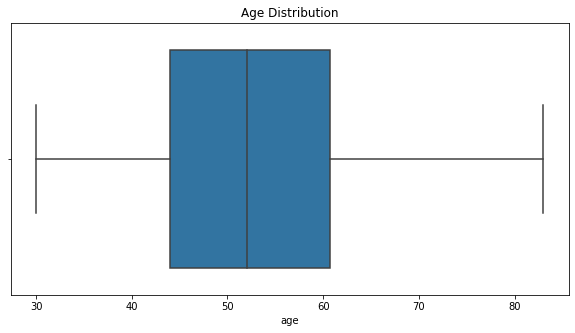

In [6]:
plt.subplots(figsize=(10,5))
sns.boxplot(haber['age'])
plt.title('Age Distribution')
plt.show()

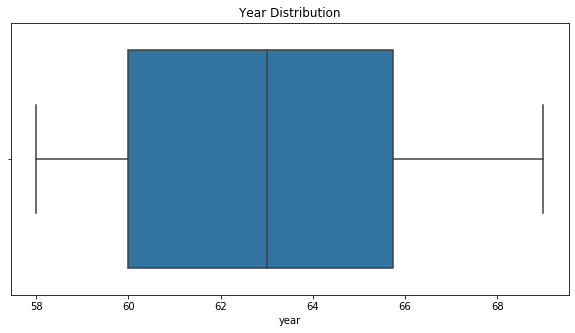

In [7]:
plt.subplots(figsize=(10,5))
sns.boxplot(haber['year'])
plt.title('Year Distribution')
plt.show()

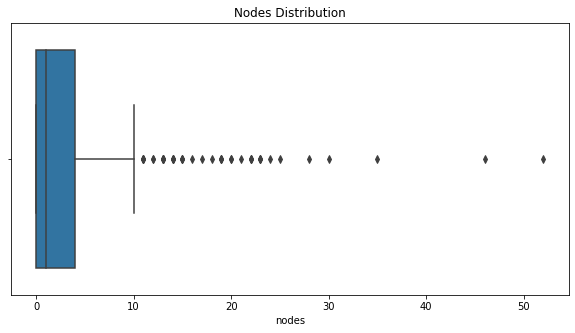

In [8]:
plt.subplots(figsize=(10,5))
sns.boxplot(haber['nodes'])
plt.title('Nodes Distribution')
plt.show()

This column has normal values from 0 to 5. There are lot of outliers by seeing the graph though it is doubtful to say that they are outliers. These many observations cannot be outliers. We will get to know that when we see the pdf

Q1-- Plot Histogram for all fearutes of the data set and write comments on which feature is best for predicting survival status.

(Hint: Use same process as did in iris data set.)

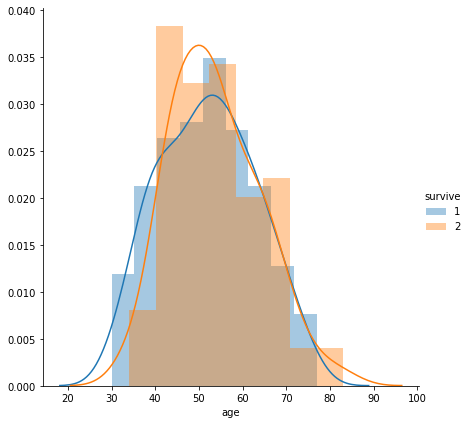

In [9]:
#Write your code here for ploting--
sns.FacetGrid(haber, hue='survive',height=6).map(sns.distplot,'age').add_legend()

Age is definitely not the column as both the probabilities are close to each other 

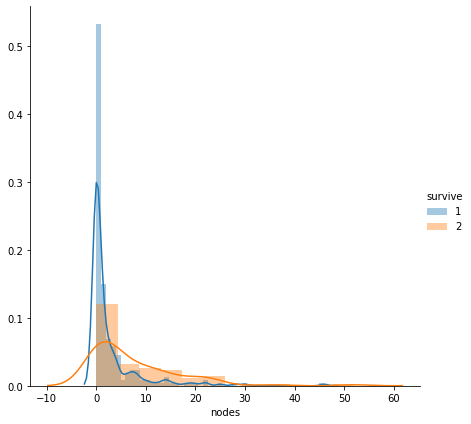

In [10]:
sns.FacetGrid(haber, hue='survive',height=6).map(sns.distplot,'nodes').add_legend()

Well, nodes can be a column which can be used to inuitively predict that if the number of nodes is near to zero, the patient has some chance of surviving. The people with 0 or 1 nodes are the people who can be said with most certainty that they will survive for the next 5 years. 

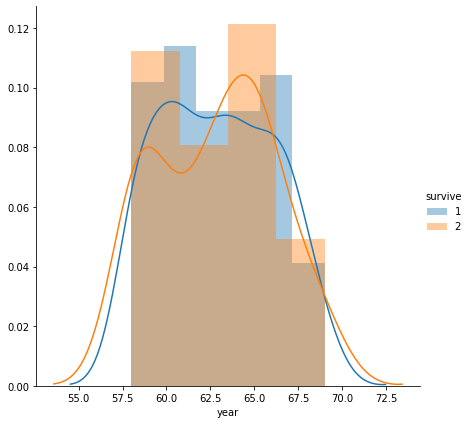

In [11]:
sns.FacetGrid(haber, hue='survive',height=6).map(sns.distplot,'year').add_legend()

#### There is no clear cut conclusion that can be made as none of the columns can be used to successfully determine whether the patient will live more than 5 years or not. The only thing that can be said from the nodes column is that if the number or nodes is near to zero, the patient has the highest probability of living.

Q2-- On the ipl wala dataset create a function which will accept a batsman name and 1 interger value and returns the number of runs he has after those many matches

E.g Input (V Kohli, 18)

Output - 678(Runs scored by Virat Kohli after 18 matches

In [12]:
matches=pd.read_csv('matches (1).csv')
delivery=pd.read_csv('deliveries(1).csv')

In [13]:
def batsman_after_match(batsman_name,matches):
    batsman=delivery.groupby(['batsman','match_id']).sum()['batsman_runs'].reset_index()
    return batsman[batsman['batsman']==batsman_name].reset_index().iloc[:matches]['batsman_runs'].sum()

In [14]:
batsman_after_match('V Kohli',50)

1061

In [15]:
batsman_after_match('MS Dhoni',50)

1217

In [16]:
batsman_after_match('AB de Villiers',50)

1273

Q3: Write a function which will plot the match wise scores of two batsman in the form of a PDF, check this [image](https://drive.google.com/open?id=18y9DiuVvNZ3p5LIBv-eaDVxNtXrI7hp9)
<img src=""/>

In [17]:
batsman1='V Kohli'
batsman2='MS Dhoni'
bat1=[]
for i in range(150):
    bat1.append([batsman_after_match(batsman1,i),batsman1])
    bat1.append([batsman_after_match(batsman2,i),batsman2])
    
    

In [18]:
bat1=np.array(bat1)

In [19]:
cmp_bats=pd.DataFrame({'runs':bat1[:,0], 'name':bat1[:,1]})
cmp_bats

,runs,name
0,0,V Kohli
1,0,MS Dhoni
2,62,V Kohli
3,12,MS Dhoni
4,90,V Kohli
...,...,...
295,3681,MS Dhoni
296,4743,V Kohli
297,3706,MS Dhoni
298,4775,V Kohli


In [20]:
cmp_bats['runs']=cmp_bats['runs'].astype('int')

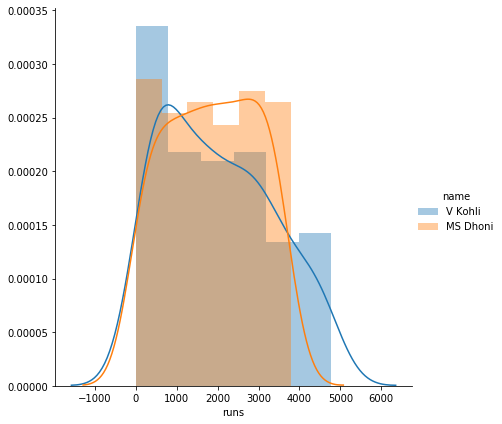

In [21]:

sns.FacetGrid(data=cmp_bats,hue='name',height=6).map(sns.distplot,'runs').add_legend()

Q3-- Write a function which will take a list as input and in return plot PDF and CDF curve as like in IRIS one.

     (you have to write your on logic for np.cumsum()--(cummulative sum- function) )

In [0]:
# Write your code here--

In [78]:
def plot_pdf_cdf(data):
    counts,bins=np.histogram(data,bins=10)
    pdf=counts/sum(counts)
    
    cdf=[]
    for i in pdf:
        try:
            cdf.append(cdf[-1]+i)
        except:
            cdf.append(i)
    plt.subplots(figsize=(10,5))
    plt.plot(bins[:-1],cdf,label='cdf')
    plt.plot(bins[:-1],pdf,label='pdf')
    plt.legend()
    plt.ylabel('Probability')
    plt.xlabel('Quantity')
    plt.title('Pdf and Cdf')
    plt.show()

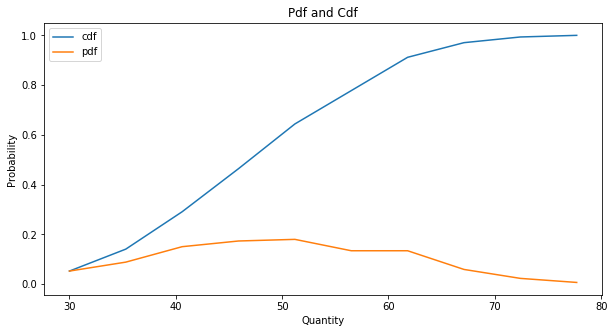

In [79]:
plot_pdf_cdf(haber['age'])

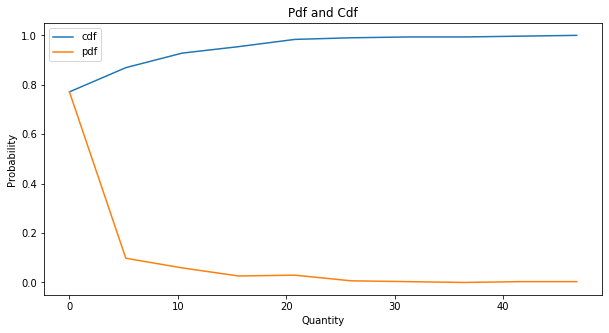

In [80]:
plot_pdf_cdf(haber['nodes'])

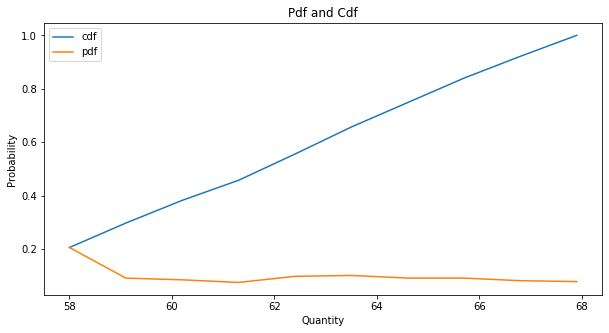

In [81]:
plot_pdf_cdf(haber['year'])